In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

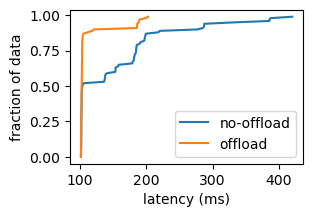

In [3]:
fig, ax = plt.subplots(figsize=(3,2))

df = pd.read_csv('../fecore_data/simple-node-run-lats', header=None)
df['float_lat'] = df[0].apply(lambda x : float(x[:-2]))
N = len(df)
X2 = np.sort(df['float_lat'])
F2 = np.array(np.arange(N))/float(N)
ax.plot(X2,F2)


df = pd.read_csv('../fecore_data/simple-node-run-offload-lats', header=None)
df['float_lat'] = df[0].apply(lambda x : float(x[:-2]))
df['float_lat'] = df[0].apply(lambda x : float(x[:-2]))
N = len(df)
X2 = np.sort(df['float_lat'])
F2 = np.array(np.arange(N))/float(N)
ax.plot(X2,F2)

ax.set_xlabel('latency (ms)')
ax.set_ylabel('fraction of data')
ax.legend(['no-offload', 'offload'])


## Changes to FECORE / Provider

1. Limit replica creations to total cores on system (or lesser) 
2. Make requests block if no idle replicas are available.
    1. go channels to communicate availability of idle replicas
3. Incorporate tracking of incoming requests for queue length determination
    1. Proxy keeps track of all requests in a shared DS
    
## Initial results
1. Blue line tracks if you don't offload
2. Orange line where you offload every other request to share the load
3. validates offloading mechanism on synthethic function invocation (which has a ST of 100ms)

## Next steps
1. For next, week evlauate fed-edge policy on a 4 vm setup

## Special Problem Students
1. UGs (Ikhyun, Aidan & Vishal) still working on setting up and porting applicaions to FaaS
2. MS (Jithin) has setup up prior art OpenWhisk (ServerlessOnEdge - RTIME policy)
    1. evaluate load pattern on OW

In [4]:
def conv(s):
    idx = -1
    for i,c in enumerate(s):
        if c!='.' and not c.isnumeric():
            idx = i
            break
#     print(s[idx])
    unit = s[idx:]
    num = float(s[:idx])
    if unit =='s':
        num=num*1000

    return num

def pt(fn, ax):
    df = pd.read_csv(fn, header=None)
    df['float_lat'] = df[0].apply(conv)
    N = len(df)
    X2 = np.sort(df['float_lat'])
    F2 = np.array(np.arange(N))/float(N)
    ax.plot(X2,F2)

In [ ]:
fig, ax = plt.subplots(figsize=(3,2))




pt('../fecore_data/testing-qmods/local.out', ax)  
pt('../fecore_data/testing-qmods/alt.out', ax) 
pt('../fecore_data/testing-qmods/queue.out', ax) 
pt('../fecore_data/testing-qmods/feo.out', ax) 
  



ax.set_xlabel('latency (ms)')
ax.set_ylabel('fraction of data')
ax.legend(['local', 'alternate', 'queue-honored'])

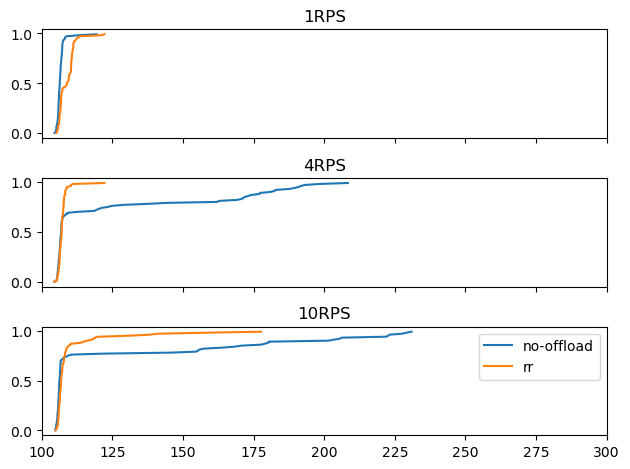

In [44]:
fig, axs = plt.subplots(3,1,sharex=True)

ax=axs[0]
pt('../feodata/base1.out',ax)
pt('../feodata/rr1.out',ax)
ax.set_title('1RPS')


ax=axs[1]
pt('../feodata/base2-1.out',ax)
pt('../feodata/rr2-1.out',ax)
ax.set_title('4RPS')


ax=axs[2]
pt('../feodata/base3.out',ax)
pt('../feodata/rr3.out',ax)
ax.legend(['no-offload', 'rr'])
ax.set_title('10RPS')

ax.set_xlim((100,300))
fig.tight_layout()


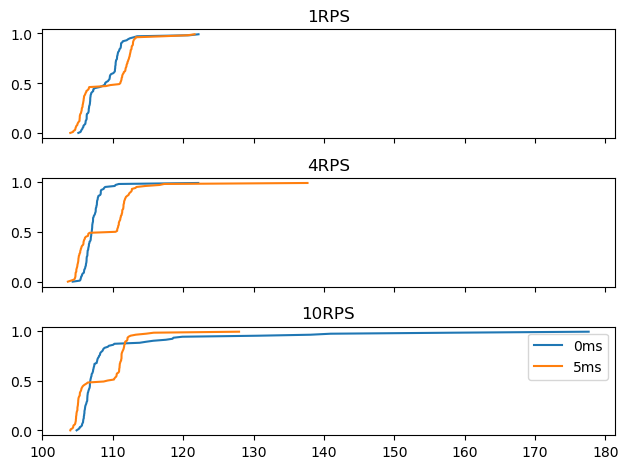

In [52]:
fig, axs = plt.subplots(3,1,sharex=True)

ax=axs[0]
pol="rr"
pt(f'../feodata/{pol}1.out',ax)
pt(f'../feodata/5ms-{pol}1.out',ax)
ax.set_title('1RPS')


ax=axs[1]
pt(f'../feodata/{pol}2-1.out',ax)
pt(f'../feodata/5ms-{pol}2.out',ax)
ax.set_title('4RPS')


ax=axs[2]
pt(f'../feodata/{pol}3.out',ax)
pt(f'../feodata/5ms-{pol}3.out',ax)
ax.legend(['0ms', '5ms'])
ax.set_title('10RPS')

# ax.set_xlim((100,300))
fig.tight_layout()

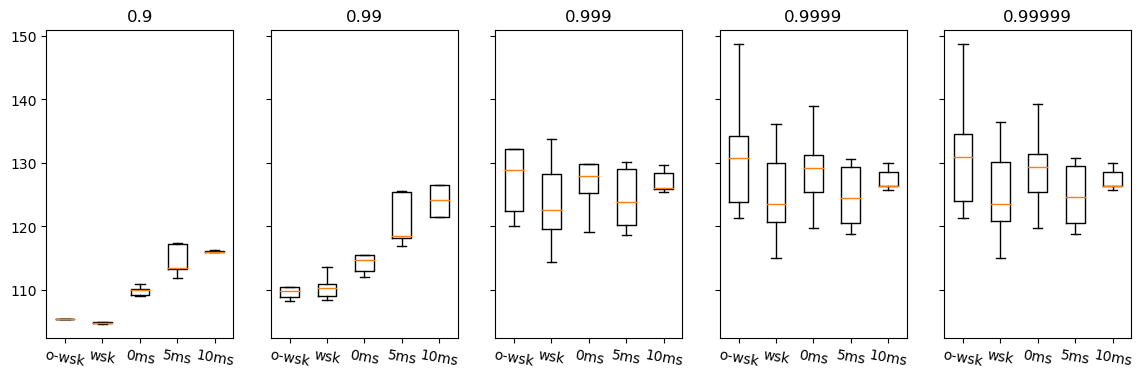

In [87]:
dataroot='../feodata/clab-176737/results/'

fig, ax = plt.subplots(1,5, sharey=True, figsize=(14,4))

def ptqtl_rr(qtl, ax):
    boxes = []
    base=f'{dataroot}/r5'
    files = os.listdir(base)
    p99 = []
    for f in files:
        if f=='info':
            continue
        df = pd.read_csv(f'{base}/{f}', header=None)
        df[1] = df[0].apply(conv)
        p99.append(df[1].quantile(qtl))

    boxes.append(p99)
    
    base=f'{dataroot}/r6'
    files = os.listdir(base)
    p99 = []
    for f in files:
        if f=='info':
            continue
        df = pd.read_csv(f'{base}/{f}', header=None)
        df[1] = df[0].apply(conv)
        p99.append(df[1].quantile(qtl))

    boxes.append(p99)
    
    
    base=f'{dataroot}/r1'
    files = os.listdir(base)
    p99 = []
    for f in files:
        if f=='info':
            continue
        df = pd.read_csv(f'{base}/{f}', header=None)
        df[1] = df[0].apply(conv)
        p99.append(df[1].quantile(qtl))

    boxes.append(p99)

    base=f'{dataroot}/r2'
    files = os.listdir(base)
    p99 = []
    for f in files:
        if f=='info':
            continue
        df = pd.read_csv(f'{base}/{f}', header=None)
        df[1] = df[0].apply(conv)
        p99.append(df[1].quantile(qtl)) 
    boxes.append(p99)

    base=f'{dataroot}/r3'
    files = os.listdir(base)
    p99 = []
    for f in files:
        if f=='info':
            continue
        df = pd.read_csv(f'{base}/{f}', header=None)
        df[1] = df[0].apply(conv)
        p99.append(df[1].quantile(qtl)) 
    boxes.append(p99)
    
    ax.boxplot(boxes, showfliers=False)
    ax.set_title(qtl)
    ax.set_xticklabels(['o-wsk','wsk','0ms', '5ms', '10ms'], rotation=-10)

ptqtl_rr(0.9,     ax[0])
ptqtl_rr(0.99,    ax[1])
ptqtl_rr(0.999,   ax[2])
ptqtl_rr(0.9999,  ax[3])
ptqtl_rr(0.99999, ax[4])

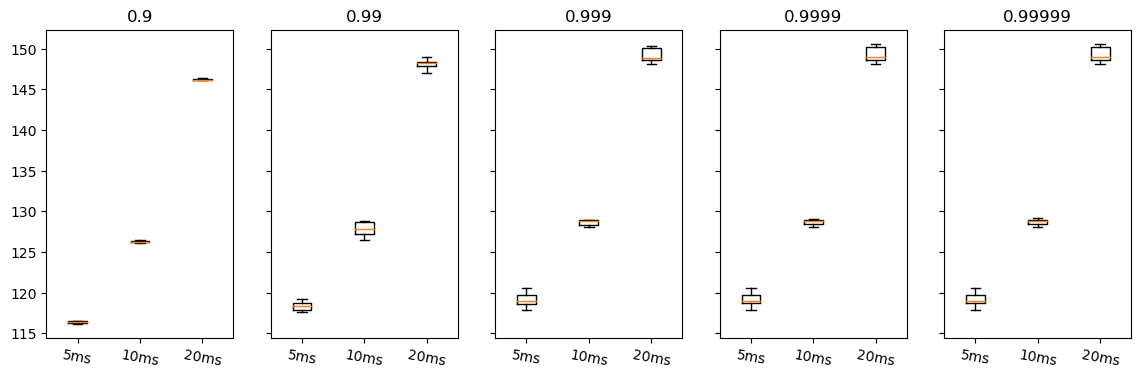

In [197]:
dataroot='../feodata/clab-176737/results/'

fig, ax = plt.subplots(1,5, sharey=True, figsize=(14,4))

def ptqtl_rr(qtl, ax):
    boxes = []
    base=f'{dataroot}/r11'
    files = os.listdir(base)
    p99 = []
    for f in files:
        if f=='info':
            continue
        df = pd.read_csv(f'{base}/{f}', header=None)
        df[1] = df[0].apply(conv)
        p99.append(df[1].quantile(qtl))

    boxes.append(p99)
    
    base=f'{dataroot}/r12'
    files = os.listdir(base)
    p99 = []
    for f in files:
        if f=='info':
            continue
        df = pd.read_csv(f'{base}/{f}', header=None)
        df[1] = df[0].apply(conv)
        p99.append(df[1].quantile(qtl))

    boxes.append(p99)
    
    base=f'{dataroot}/r13'
    files = os.listdir(base)
    p99 = []
    for f in files:
        if f=='info':
            continue
        df = pd.read_csv(f'{base}/{f}', header=None)
        df[1] = df[0].apply(conv)
        p99.append(df[1].quantile(qtl))

    boxes.append(p99)
    
    ax.boxplot(boxes, showfliers=False)
    ax.set_title(qtl)
    ax.set_xticklabels(['5ms', '10ms', '20ms'], rotation=-10)

ptqtl_rr(0.9,     ax[0])
ptqtl_rr(0.99,    ax[1])
ptqtl_rr(0.999,   ax[2])
ptqtl_rr(0.9999,  ax[3])
ptqtl_rr(0.99999, ax[4])

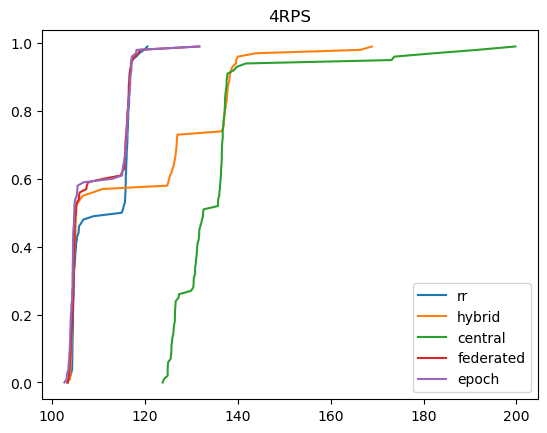

In [97]:
fig,ax=plt.subplots()
pt(f'../feodata/clab-176737/results/r11/roundrobin1.out',ax)
pt(f'../feodata/clab-176737/results/r7/hybrid1.out',ax)
pt(f'../feodata/clab-176737/results/r8/central1.out',ax)
pt(f'../feodata/clab-176737/results/r9/federated1.out',ax)
pt(f'../feodata/clab-176737/results/r10/epoch1.out',ax)

ax.set_title('4RPS')
ax.legend(['rr','hybrid','central','federated','epoch'])

Text(0.5, 0, 'mean user arrival rate')

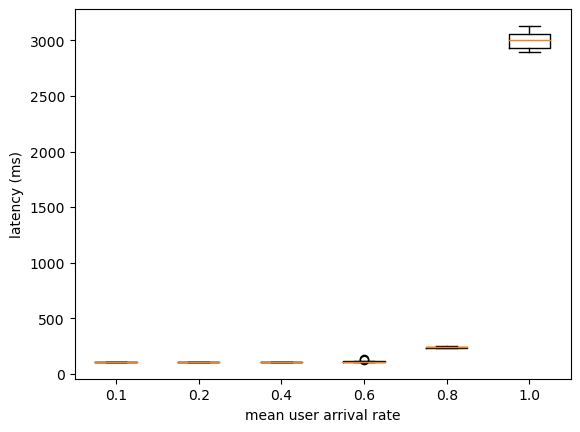

In [5]:
rootdir='../feodata/clab-178922/var_loads/'
iter_start=1
iter_end=11
info = pd.read_csv(f'{rootdir}/info', header=None)

d = {}
for i in range(len(info)):
    name=info[0].at[i]
    uid=info[1].at[i]
    tokens=name.split('_')
    lam=float(tokens[5][3:])
    d[lam] = uid
    
buckets = []
for k in sorted(d.keys()):
    bucket = []
    for j in range(iter_start,iter_end):
        df = pd.read_csv(f'{rootdir}/{d[k]}-{j}.out', header=None)
        df[1] = df[0].apply(conv)
        bucket.append(df[1].quantile(0.50))
    buckets.append(bucket)
    
fig,ax = plt.subplots()
ax.boxplot(buckets)
# ax.set_yscale('log')
# ax.set_ylim(0,200)
ax.set_xticklabels(sorted(d.keys()))
ax.set_ylabel('latency (ms)')
ax.set_xlabel('mean user arrival rate')
    

Text(0.5, 0, 'mean user arrival rate')

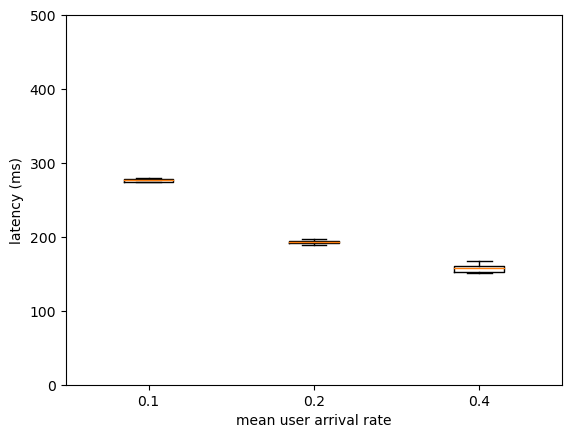

In [207]:
rootdir='../feodata/clab-178922/var_loads_cs_test/'
iter_start=1
iter_end=6
info = pd.read_csv(f'{rootdir}/info', header=None)

d = {}
for i in range(len(info)):
    name=info[0].at[i]
    uid=info[1].at[i]
    tokens=name.split('_')
    lam=float(tokens[5][3:])
    d[lam] = uid
    
buckets = []
for k in sorted(d.keys()):
    bucket = []
    for j in range(iter_start,iter_end):
        df = pd.read_csv(f'{rootdir}/{d[k]}-{j}.out', header=None)
        df[1] = df[0].apply(conv)
        bucket.append(df[1].quantile(0.99))
    buckets.append(bucket)
    
fig,ax = plt.subplots()
ax.boxplot(buckets)
# ax.set_yscale('log')
ax.set_ylim(0,500)
ax.set_xticklabels(sorted(d.keys()))
ax.set_ylabel('latency (ms)')
ax.set_xlabel('mean user arrival rate')

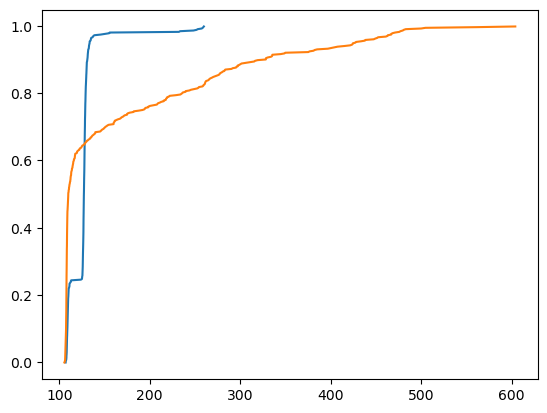

In [10]:
file='../feodata/clab-178922/test/lam0.6_rate2.0_site.out'
fig,ax=plt.subplots()
pt(file, ax)
file='../feodata/clab-178922/var_loads/2-5.out'
pt(file,ax)

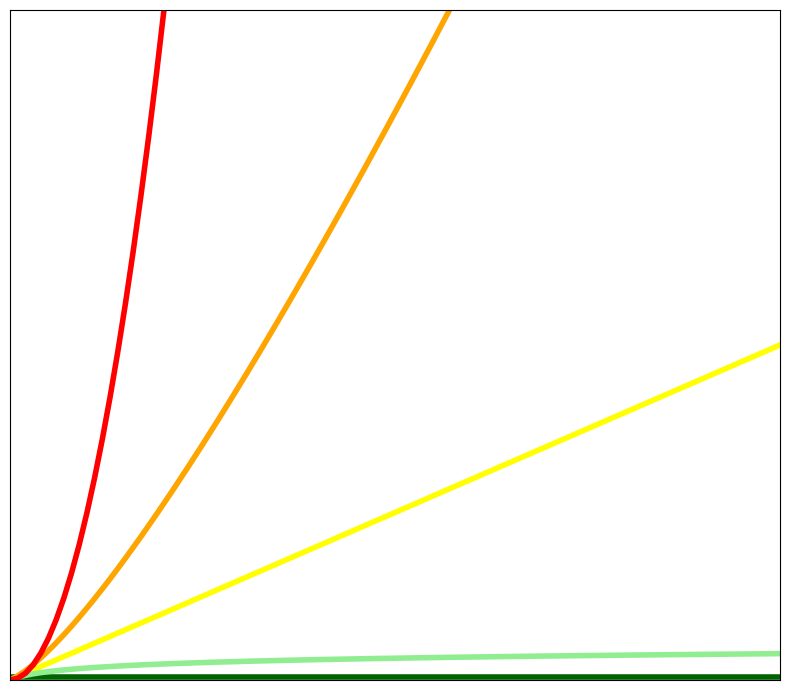

In [196]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'


ivals = np.arange(0,100,0.5)
ivals2 = np.arange(1,100,0.5)
fig,ax = plt.subplots(figsize=(8,7))
yvals1 = ivals
yvals2 = np.log(ivals2)
yvals3 = np.power(ivals, 2)
yvals4 = ivals2*yvals2
yvals5 = scipy.special.factorial(ivals)

lw=4
ax.axhline(y=0.5, color='darkgreen', linewidth=lw)
ax.plot(yvals1, color='yellow', linewidth=lw)
ax.plot(yvals2, color='lightgreen', linewidth=lw)
ax.plot(yvals4, color='orange', linewidth=lw)
ax.plot(yvals3, color='red', linewidth=lw)
# ax.plot(yvals5, color='maroon', linewidth=lw)

ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
ax.set_facecolor('white')
fig.tight_layout()

In [134]:
import scipy

0.608197665

array([  0.        ,   0.60819766,   1.38629436,   2.29072683,
         3.29583687,   4.38467039,   5.54517744,   6.76834829,
         8.04718956,   9.37611451,  10.75055682,  12.16671415,
        13.62137104,  15.11177265,  16.63553233,  18.19056239,
        19.7750212 ,  21.38727209,  23.02585093,  24.6894402 ,
        26.376848  ,  28.08699091,  29.8188798 ,  31.57160805,
        33.34434165,  35.13631075,  36.94680261,  38.77515542,
        40.62075302,  42.48302037,  44.36141956,  46.25544628,
        48.16462685,  50.08851542,  52.02669164,  53.97875854,
        55.9443406 ,  57.92308208,  59.91464547,  61.91871017,
        63.93497119,  65.96313811,  68.00293397,  70.05409446,
        72.11636697,  74.1895099 ,  76.27329193,  78.36749138,
        80.47189562,  82.58630053,  84.71050999,  86.84433542,
        88.98759538,  91.14011513,  93.30172628,  95.47226649,
        97.65157907,  99.83951277, 102.03592145, 104.24066385,
       106.45360334, 108.67460769, 110.90354889, 113.14